In [284]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [285]:
import warnings
warnings.filterwarnings('ignore')

In [286]:
df=pd.read_csv("patient_dataset.csv")
df.head()

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type,smoking_status
0,24,1.0,4,250,139,212,0,108.0,33.0,109.0,37.999303,0.480277,1,1,Urban,Smoker
1,29,0.0,4,132,187,147,0,202.0,42.0,NaN,25.588346,0.283986,1,1,Urban,Unknown
2,46,0.0,3,271,185,193,0,149.0,43.0,102.0,37.892029,2.472309,1,0,Rural,Non-Smoker
3,73,NaN,2,102,200,125,0,105.0,77.0,165.0,18.660241,1.472052,0,1,Rural,Smoker
4,49,1.0,3,91,163,192,0,162.0,31.0,170.0,12.767980,0.537627,1,1,Rural,Smoker


In [287]:
df.isna().any()

age                  False
gender                True
chest_pain_type      False
blood_pressure       False
cholesterol          False
max_heart_rate       False
exercise_angina      False
plasma_glucose        True
skin_thickness        True
insulin               True
bmi                  False
diabetes_pedigree    False
hypertension         False
heart_disease        False
residence_type        True
smoking_status       False
dtype: bool

In [288]:
print("Notice that there are some columns with null values")

Notice that there are some columns with null values


In [289]:
df.dropna(inplace=True, ignore_index=True)
df.isna().sum()

age                  0
gender               0
chest_pain_type      0
blood_pressure       0
cholesterol          0
max_heart_rate       0
exercise_angina      0
plasma_glucose       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
hypertension         0
heart_disease        0
residence_type       0
smoking_status       0
dtype: int64

In [290]:
print("The data has now no null values.")

The data has now no null values.


In [291]:
df.dtypes

age                    int64
gender               float64
chest_pain_type        int64
blood_pressure         int64
cholesterol            int64
max_heart_rate         int64
exercise_angina        int64
plasma_glucose       float64
skin_thickness       float64
insulin              float64
bmi                  float64
diabetes_pedigree    float64
hypertension           int64
heart_disease          int64
residence_type        object
smoking_status        object
dtype: object

In [292]:
print("The data type of each correct is correct. However, the gender column is of float type. \nSo, it is better to change its data type to integer.")

The data type of each correct is correct. However, the gender column is of float type. 
So, it is better to change its data type to integer.


In [293]:
df["gender"]=df["gender"].astype(int)

In [294]:
df.shape

(3734, 16)

In [295]:
print("The data has now 3734 observation and 16 features")

The data has now 3734 observation and 16 features


In [296]:
from sklearn.preprocessing import LabelEncoder

In [297]:
labelencoder=LabelEncoder()
labelencoder.fit(df["smoking_status"])
df["smoking_status"]=labelencoder.transform(df["smoking_status"])

In [298]:
labelencoder.fit(df["residence_type"])
df["residence_type"]=labelencoder.transform(df["residence_type"])

# KMeans Clustering

In [299]:
print("Now, we are only considering three features just to understand the k-means clustering in three dimensinal space")

Now, we are only considering three features just to understand the k-means clustering in three dimensinal space


In [300]:
print("Consider the features age, cholesterol and blood_pressure")

Consider the features age, cholesterol and blood_pressure


In [301]:
data=df[["age", "blood_pressure", "cholesterol"]]
data.head()

,age,blood_pressure,cholesterol
0,24,250,139
1,46,271,185
2,49,91,163
3,63,18,154
4,37,263,201


In [302]:
from sklearn.preprocessing import StandardScaler

In [303]:
scaler=StandardScaler()
scaler.fit(data)

StandardScaler()

In [304]:
sdata=scaler.transform(data)

In [305]:
print("Now, the data is standarized.")

Now, the data is standarized.


In [306]:
from sklearn.cluster import KMeans

In [307]:
model=KMeans(n_clusters=3, random_state=1)
model.fit(sdata)
sdata=model.transform(sdata)

In [308]:
clusters=model.predict(sdata)

In [309]:
data["clusters"]=clusters
data

,age,blood_pressure,cholesterol,clusters
0,24,250,139,1
1,46,271,185,1
2,49,91,163,1
3,63,18,154,1
4,37,263,201,1
...,...,...,...,...
3729,71,106,219,1
3730,76,117,247,1
3731,51,173,297,1
3732,70,120,234,1


In [310]:
print("In above lines, we use k=3. However, we can find the optimal number of k using elbow method or silhouette score.")

In above lines, we use k=3. However, we can find the optimal number of k using elbow method or silhouette score.


# Elbow method

The elbow method is a popular technique for determining the optimal number of clusters (𝑘) in KMeans clustering. It works by plotting the inertia (sum of squared distances from each point to its nearest cluster center) against various values of 𝑘 and identifying a point where the rate of decrease slows down, forming an "elbow" shape.

In [311]:
inertia=[]
for k in range(11):
    model=KMeans(n_clusters=k+1, random_state=1)
    model.fit_transform(sdata)
    inertia.append(model.inertia_)
inertia

[7168.923105689978,
 5147.638625514404,
 3691.105943065924,
 2557.5689677421597,
 2258.1915422828565,
 1893.9155825397609,
 1615.6581782174069,
 1493.0994336659105,
 1292.0715117039513,
 1207.2895271663813,
 1112.6997273814459]

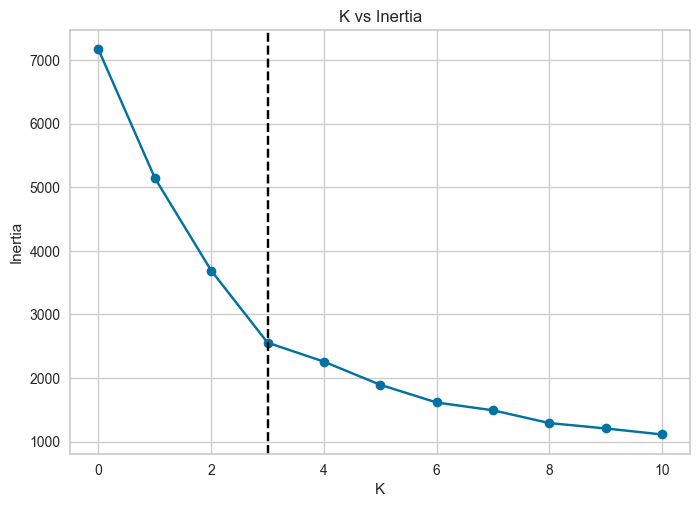

In [312]:
plt.plot(inertia, marker="o")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("K vs Inertia")
plt.axvline(x=3, color="black", linestyle="--")

In [313]:
print("Notice that a point where the rate of decrease slows down, forming an elbow shape is at k=3. \nTherefore, we can choose k=3 as optimal value")

Notice that a point where the rate of decrease slows down, forming an elbow shape is at k=3. 
Therefore, we can choose k=3 as optimal value


# Note that the KMeans clustering can be extended to higer dimensions.